# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [2]:
print(X_train.dtype)
print(y_train.dtype)

uint8
uint8


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random

signs={}
with open('signnames.csv','r') as sign_f:
    for line in sign_f:
        #line=sign_f.readline()
        class_id,signname=line.split(',')
        signs[class_id]=signname.strip()
    



Speed limit (20km/h)  :  180
Speed limit (30km/h)  :  1980
Speed limit (50km/h)  :  2010
Speed limit (60km/h)  :  1260
Speed limit (70km/h)  :  1770
Speed limit (80km/h)  :  1650
End of speed limit (80km/h)  :  360
Speed limit (100km/h)  :  1290
Speed limit (120km/h)  :  1260
No passing  :  1320
No passing for vehicles over 3.5 metric tons  :  1800
Right-of-way at the next intersection  :  1170
Priority road  :  1890
Yield  :  1920
Stop  :  690
No vehicles  :  540
Vehicles over 3.5 metric tons prohibited  :  360
No entry  :  990
General caution  :  1080
Dangerous curve to the left  :  180
Dangerous curve to the right  :  300
Double curve  :  270
Bumpy road  :  330
Slippery road  :  450
Road narrows on the right  :  240
Road work  :  1350
Traffic signals  :  540
Pedestrians  :  210
Children crossing  :  480
Bicycles crossing  :  240
Beware of ice/snow  :  390
Wild animals crossing  :  690
End of all speed and passing limits  :  210
Turn right ahead  :  599
Turn left ahead  :  360
Ahead 

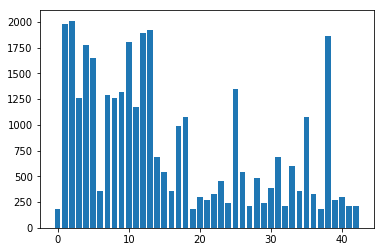

In [5]:
import numpy as np

def get_frequency(y,distict):
    freq = []
    for i in range(distict):
        freq.append(np.sum(y == i))
    return freq

train_frequency= get_frequency(y_train,43)

plt.bar(range(43),train_frequency)

label_id=0
for i in train_frequency:
    print(signs[str(label_id)]," : ",i)
    label_id+=1

In [6]:
# My helper methods 

# Plot multiple images using plt.subplot

import math

def plot_multiple_images(images,names,gray=False,number_of_cols=6):
    
    number_of_images=len(images)

    number_of_rows=math.ceil(number_of_images*1.0/number_of_cols)

    
    
    fig_width=4*number_of_cols  
    fig_height=4*number_of_rows
    
    if number_of_rows > 5 :
        _dpi = number_of_rows * 5
    else :
        _dpi = 30
    
    #fig=plt.figure(figsize=(fig_width, fig_height),dpi=_dpi, facecolor='w', edgecolor='w')
    fig=plt.figure(figsize=(fig_width, fig_height), facecolor='w', edgecolor='w')
    
    im_number=0
    for im, name in zip(images,names):
        im_number+=1
        plt.subplot(number_of_rows,number_of_cols,im_number)
        plt.title(name)
        if gray :
            plt.imshow(im,cmap='gray')
        else :
            plt.imshow(im)

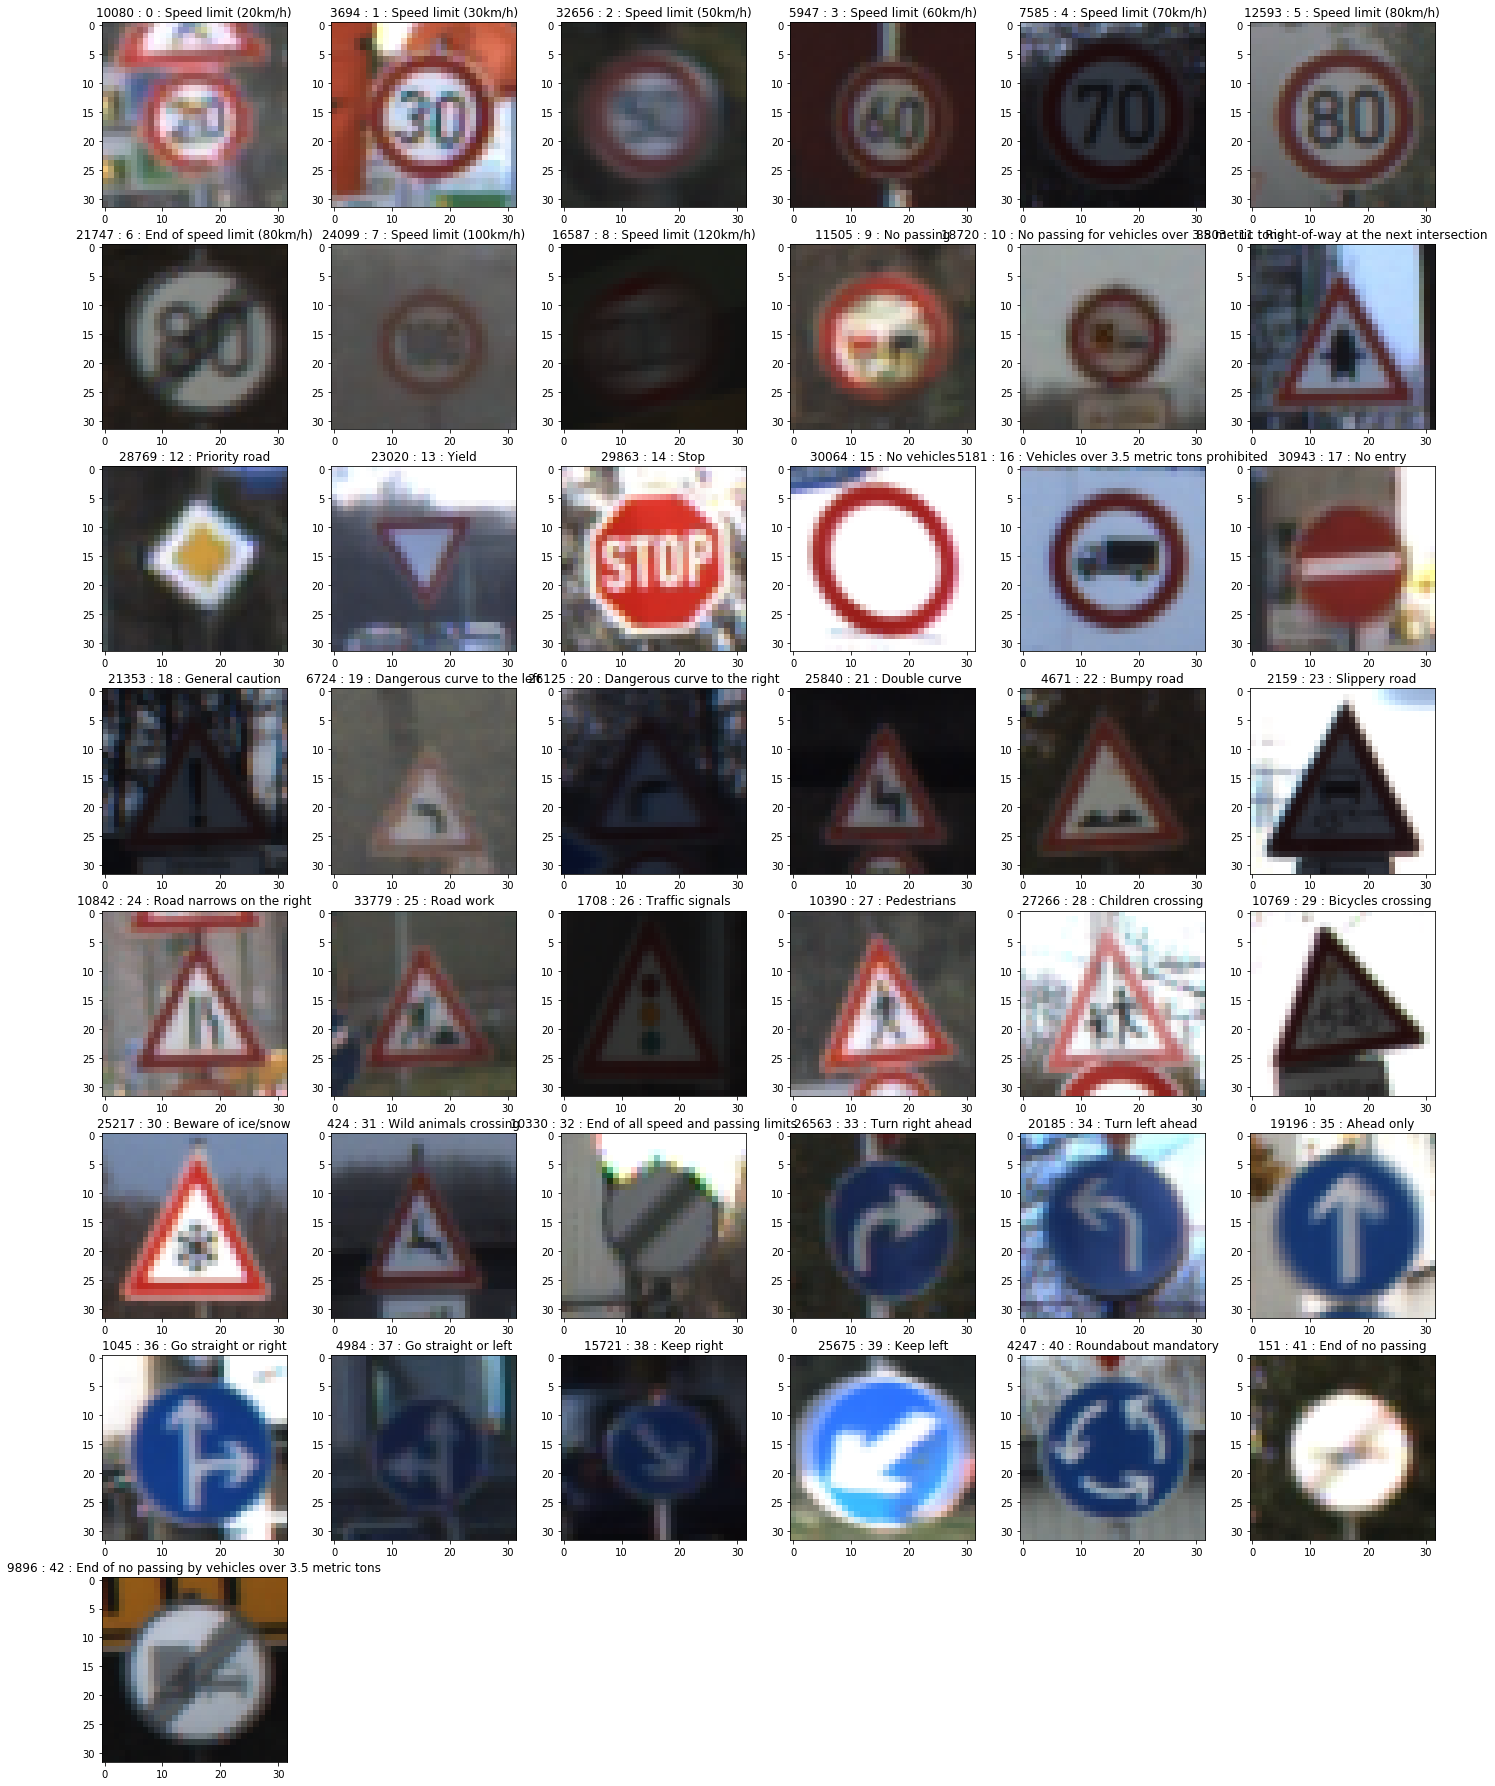

In [7]:
import random
import collections  

imgs=[]
labels=[]
label_index_map={}

# collect distinct images of each sign 
while True:
    
    index = random.randint(0, len(X_train))
    sign_id=y_train[index]
    if  sign_id in label_index_map :
        continue
    else :
        label_index_map[sign_id]=index
 
    if len(label_index_map) == 43 :
        break
        

od=collections.OrderedDict(sorted(label_index_map.items()))

for lable_id,index in od.items():
    image = X_train[index].squeeze()
    label=str(index)+" : "+str(lable_id)+" : "+signs[str(y_train[index])]
    imgs.append(image)
    labels.append(label)
    
plot_multiple_images(imgs,labels,gray=False)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Data augmentation 

In [8]:
# Data augmentation using skimage libraries
# cv2 libraries can be used however to get combined effect skimage is convinient

import skimage
import skimage.transform

def get_transformation_combinations(im_shape,angle_range=20,trans_range=5,shear_range=10):
    center_shift = np.array(im_shape[:2]) / 2. 
    
    # to shift center to origin [0,0]
    tform_center = skimage.transform.SimilarityTransform(translation=-center_shift)
    
    # to shift center back
    tform_uncenter = skimage.transform.SimilarityTransform(translation=center_shift)
    
    angle = np.random.uniform(-angle_range,angle_range)
       
    tform_rotate_origin = skimage.transform.SimilarityTransform(scale=1, rotation=np.deg2rad(angle))
    
    tform_rotate_center = tform_center + (tform_rotate_origin + tform_uncenter)
    
    tr_x = np.random.uniform(-trans_range,trans_range)
    tr_y = np.random.uniform(-trans_range,trans_range)
    
    translation=(tr_x,tr_y)
    
    tform_translate = skimage.transform.AffineTransform(scale=(1, 1), translation=translation)
    
    shear = np.random.uniform(-shear_range,shear_range)

    tform_shear = skimage.transform.AffineTransform(scale=(1, 1), shear=np.deg2rad(shear))
    
    tform_all_aug = skimage.transform.AffineTransform(scale=(1, 1), rotation=np.deg2rad(angle), shear=np.deg2rad(shear), translation=translation)
    
    tform_all = tform_center + (tform_all_aug + tform_uncenter)
   
    return tform_rotate_center, tform_translate, tform_shear, tform_all

In [9]:
def augment_image(im):
    
    imgs=[]
    
    im_shape=im.shape
    
    for i in range(3):
        tform_rotate_center, tform_translate, tform_shear, tform_all = get_transformation_combinations(im_shape)
        
               
        rotated = skimage.transform.warp(im, tform_rotate_center)
        translated = skimage.transform.warp(im, tform_translate)
        sheared = skimage.transform.warp(im, tform_shear)
        all_transformation = skimage.transform.warp(im, tform_all)
        
      
        rotated = rotated * 255.0
        rotated = rotated.astype(np.uint8)
        
        translated = translated * 255.0
        translated = translated.astype(np.uint8)
        
        sheared = sheared * 255.0
        sheared = sheared.astype(np.uint8)
        
        all_transformation = all_transformation * 255.0
        all_transformation = all_transformation.astype(np.uint8)
        
        imgs.append(rotated)
        imgs.append(translated)
        imgs.append(sheared)
        imgs.append(all_transformation)
        
    return imgs

In [10]:
def augment_all_images(x,y,max_examples=4000):
    print('Started augmenting')
    new_x=[]
    new_y=[]
        
    train_frequency = get_frequency(y,43)
    
    counter=0
    for im,label in zip(x,y):
        counter+=1
        if counter % 10000 == 0:
            print('Augmenting image number ',counter)
            
        if train_frequency[label] < max_examples :
            augmented_images = augment_image(im)
            new_images=len(augmented_images)
            new_x.extend(augmented_images)
            ys=np.repeat(label,new_images)
            new_y.extend(ys)
            train_frequency[label]+=new_images
            
    return new_x,new_y

    

Started augmenting


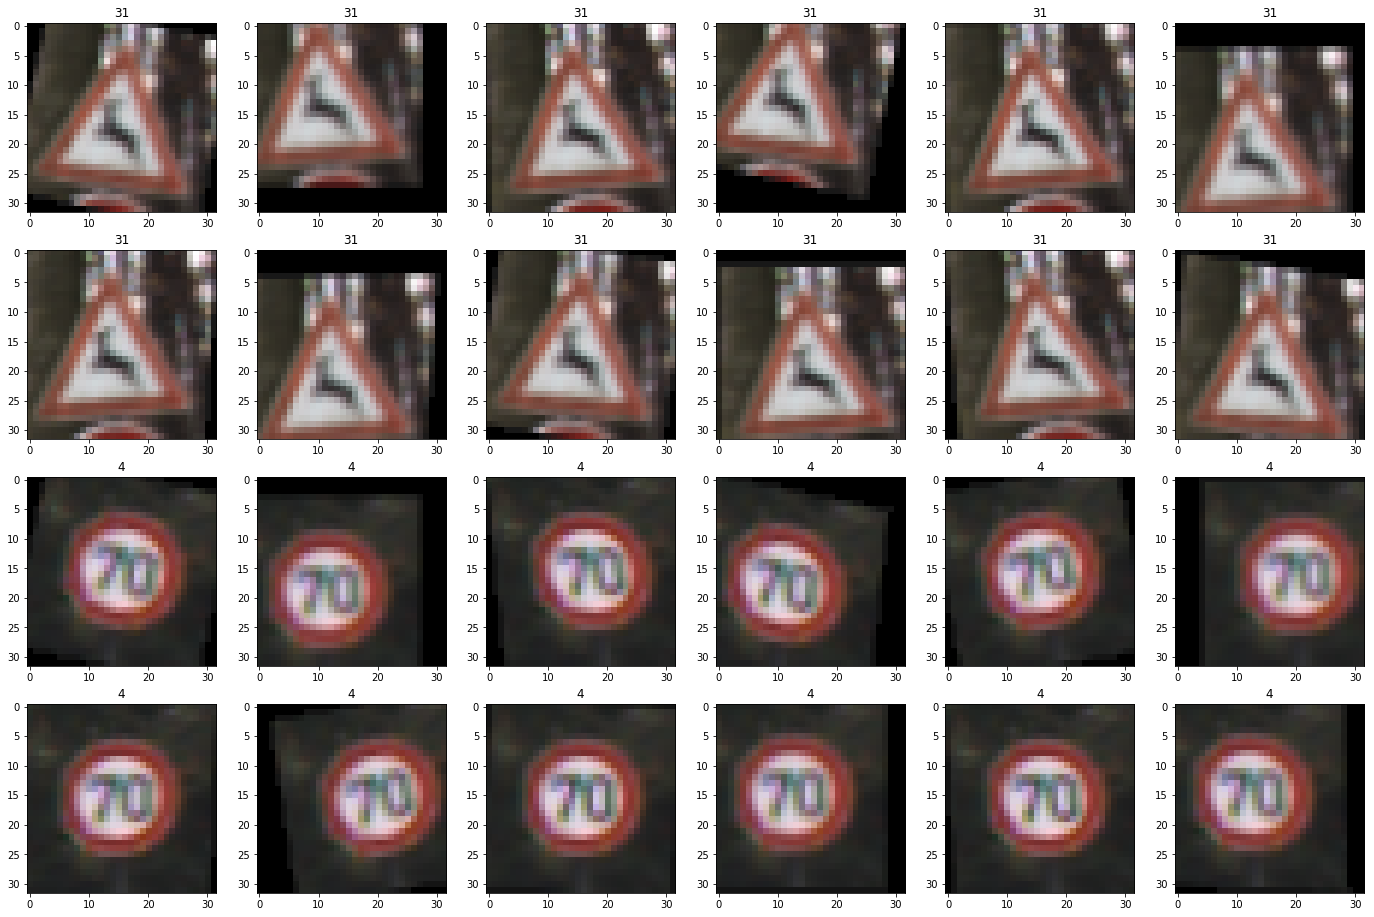

In [11]:
# agument for 2 different classes
new_x,new_y=augment_all_images(X_train[np.array([839,7178])],y_train[np.array([839,7178])],max_examples=40)


plot_multiple_images(new_x,new_y,gray=False)

# Pre processing

In [37]:

import cv2

def imporve_contrast(img):
    im = cv2.cvtColor(img, cv2.COLOR_RGB2HLS) # change color space to HLS
    #im[:,:,1] = cv2.equalizeHist(im[:,:,1]) # equalize histogram of lightness channel
    #apply CLAHE in OpenCV
    # https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html
    clahe = cv2.createCLAHE(clipLimit=15.0, tileGridSize=(5,5))
    im[:,:,1] = clahe.apply(im[:,:,1])   
    im = cv2.cvtColor(im, cv2.COLOR_HLS2RGB) # convert back to RGB 
    return im

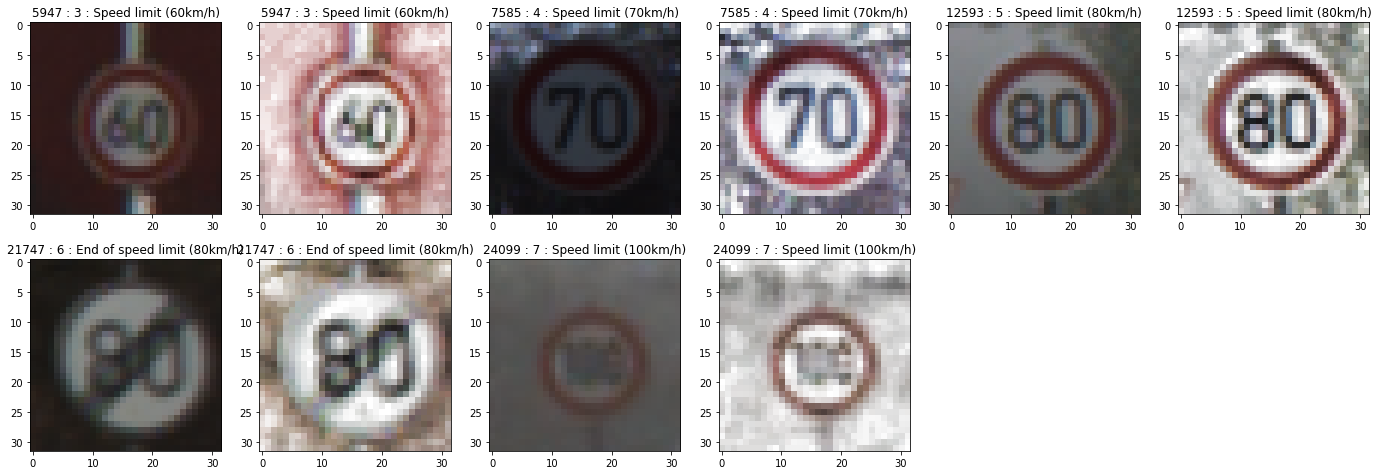

In [38]:
contract_imporoved=[]
labels=[]

for lable_id,index in od.items():
    image = X_train[index]
    im_c=imporve_contrast(image)
    label=str(index)+" : "+str(lable_id)+" : "+signs[str(y_train[index])]
    contract_imporoved.append(image)
    contract_imporoved.append(im_c)
    labels.append(label)
    labels.append(label)


plot_multiple_images(contract_imporoved[6:16],labels[6:16],gray=False)

In [32]:
# improve contract of all images

def apply_constract(images):
    contrast_images=[]
    counter=0
    for im in images :
        counter+=1

        if counter % 10000 == 0 :
            print("Contract for im no ", counter)

        im_c=imporve_contrast(im)
        contrast_images.append(im_c)
    
    return np.array(contrast_images)

In [33]:
def convert_to_gray_scale(images):
    gray_images=[]
    counter=0
    for im in images :
        counter+=1
        #if counter % 10000 == 0 :
            #print("Grayscaling for im no ", counter)

        im_gray=cv2.cvtColor(im, cv2.COLOR_RGB2GRAY )
        #im_gray=im_gray[::,np.newaxis]
        im_gray=np.expand_dims(im_gray,axis=2)
        #print(im_gray.shape)
        gray_images.append(im_gray)
    
    return np.array(gray_images)

In [34]:
def normalize(images,mean=128):
    
    return (images-128.0)/128.0


In [35]:
def doPreProcess(x_data,imporve_contrast=True,to_grayscale=True,normalize_128=True):
    
    if imporve_contrast :
        x_data=apply_constract(x_data)
    
    if to_grayscale :
        x_data=convert_to_gray_scale(x_data)
    
    if normalize_128:
        x_data=normalize(x_data,mean=128)
        
    return x_data
    
    

### Model Architecture

In [7]:
# Benchmark model Lenet

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def MyModel(X,im_channels=3):
    mu=0
    sd=0.1
    
    
    # conv1, output would be (32-5)/1+1=28 (in-filter_shape)/stride+1
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5,5,im_channels,8),mean=mu,stddev=sd))
    conv1_b = tf.Variable(tf.zeros(8))
    conv1 = tf.nn.conv2d(X,conv1_w,strides=[1,1,1,1],padding='VALID')
    conv1 = tf.nn.bias_add(conv1,conv1_b)
    
    # Relu
    conv1 = tf.nn.relu(conv1)
    # maxpool, output would be (28-2)/2+1=14 (in-ksize)/stride+1
    conv1 = tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    # conv2 output would be (14-5)/1 + 1 = 10
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5,5,8,24),mean=mu,stddev=sd))
    conv2_b = tf.Variable(tf.zeros(24))
    conv2 = tf.nn.conv2d(conv1,conv2_w,strides=[1,1,1,1],padding='VALID')
    conv2=tf.nn.bias_add(conv2,conv2_b)

    # Relu
    conv2 = tf.nn.relu(conv2)
    # maxpool output (10-2)/2+1 = 5
    conv2 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    # Flatten input = 5x5x24, ouput = (600)
    flat = flatten(conv2)
    
    # Fully connect 1, input 600, output=256
    fc1_w = tf.Variable(tf.truncated_normal(shape=(600,256),mean=mu,stddev=sd))
    fc1_b = tf.Variable(tf.zeros(256))
    fc1 = tf.add(tf.matmul(flat,fc1_w),fc1_b)
    
    #Relu
    fc1 = tf.nn.relu(fc1)
    
    #dropout 
    fc1=tf.nn.dropout(fc1, keep_prob)
    
    
    # Fully connect 2 input=256, output=128
    fc2_w = tf.Variable(tf.truncated_normal(shape=(256,128),mean=mu,stddev=sd))
    fc2_b = tf.Variable(tf.zeros(128))
    fc2 = tf.add(tf.matmul(fc1,fc2_w),fc2_b)
    
    #Relu
    fc2=tf.nn.relu(fc2)
    
    #dropout 
    fc2=tf.nn.dropout(fc2, keep_prob)
    
    # Logits input 128, output 43 classes
    fc_final_w = tf.Variable(tf.truncated_normal(shape=(128,43),mean=mu,stddev=sd))
    fc_final_b = tf.Variable(tf.zeros(43))
    
    logits=tf.add(tf.matmul(fc2,fc_final_w),fc_final_b)
    
    return logits
    

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [42]:
import tensorflow as tf

# palce holder for input data
input_channels=1
x=tf.placeholder(tf.float32,(None,32,32,input_channels),name="input_image")
#x=tf.placeholder(tf.float32,(None,32,32,input_channels))
y=tf.placeholder(tf.int32,(None),name="image_lable")
d_lr=tf.placeholder(tf.float32,name="lr_rate") # dynamic lr rate
y_one_hot=tf.one_hot(y,43)
keep_prob = tf.placeholder(tf.float32)


In [43]:
# Operation pipe line
# Using Cross entropy for loss computation adn Adam optimizer to update weights

logits=MyModel(x,input_channels)
entropy_loss=tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_one_hot)
loss_operation=tf.reduce_mean(entropy_loss)
optimizer=tf.train.AdamOptimizer(learning_rate=d_lr)
training_operation=optimizer.minimize(loss_operation)


In [44]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
avg_accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [45]:
# Evaluation accuracy

import math

BATCH_SIZE=128

def evaluate_model(x_validation, y_validation):
    number_of_examples=len(x_validation)
    #example_with_valid_accuracy=0
    total_accuracy=0.0
    
    session = tf.get_default_session()      
    
    for offset in range(0,number_of_examples,BATCH_SIZE) :
        end=offset + BATCH_SIZE
        x_batch=x_validation[offset:end]
        y_batch=y_validation[offset:end]
        avg_acc=session.run(avg_accuracy,feed_dict={x:x_batch,y:y_batch,keep_prob:1.0})
        total_accuracy+=avg_acc*len(x_batch)
        

    return total_accuracy / number_of_examples



In [73]:
from sklearn.utils import shuffle
saver=tf.train.Saver()

losses=[]
training_accuracies=[]
validation_accuracies=[]

def train_model(train_x,train_y,valid_x,valid_y,lr_rate_schedule=None,use_dropout=False,model_prefix='./traffic'):
    
    with tf.Session() as session :

        session.run(tf.global_variables_initializer())

        total_trainig_examples=len(train_x)

        print('Total ecochs : ', EPOCHS)
        print('Total training examples :',total_trainig_examples)
        fraction_iter=total_trainig_examples%BATCH_SIZE
        full_iter=total_trainig_examples//BATCH_SIZE
        if fraction_iter==0 :
            total_iter=full_iter
        else :
            total_iter=full_iter + 1

        print('Iterations per epoch', total_iter)


        for epoch in range(EPOCHS):
            print("Epoch {} ... ".format(epoch + 1))
            
            train_x,train_y=shuffle(train_x,train_y)

            loss=100
            accuracy=0.0
            
            if lr_rate_schedule :
                    lr_rate=float(lr_rate_schedule[epoch])
                    print("lr rate :", lr_rate)
            else :
                    lr_rate=float(0.001)
                    
            if use_dropout :
                keep_pro=0.5 
            else :
                keep_pro=1.0
            
            
            for START in range(0,total_trainig_examples,BATCH_SIZE):
                END=START + BATCH_SIZE
                x_batch=train_x[START:END]
                y_batch=train_y[START:END]
                
                #print('x_batch : ',len(x_batch))
                #print('data type : ',x_batch.dtype)
                
                _,loss,avg_train_accuracy = session.run([training_operation,loss_operation,avg_accuracy],
                                                        feed_dict={x:x_batch,y:y_batch,d_lr:lr_rate,keep_prob:keep_pro})


                avg_validation_accuracy=evaluate_model(valid_x, valid_y)

                losses.append(loss)
                training_accuracies.append(avg_train_accuracy)
                validation_accuracies.append(avg_validation_accuracy)


            print("Loss {:.3f}".format(loss))
            print("Training Accuracy {:.3f}".format(avg_train_accuracy))
            print("Validation Accuracy {:.3f}".format(avg_validation_accuracy))

        saver.save(session,model_prefix)


# Approch 1 : Train model without agumentation and pre processing

In [24]:
#EPOCHS = 3
import time

start_time = time.time()

EPOCHS = 10
BATCH_SIZE = 128


train_model(X_train,y_train,X_valid,y_valid,use_dropout=False,model_prefix='./no_aug_no_prep')


end_time = time.time()

t_sec = round(end_time - start_time)
(t_min, t_sec) = divmod(t_sec,60)
(t_hour, t_min) = divmod(t_min,60) 
print('Time for training: {}hour:{}min:{}sec'.format(t_hour,t_min,t_sec))

Total ecochs :  10
Total training examples : 34799
Iterations per epoch 272
Epoch 1 ... 
Loss 1.158
Training Accuracy 0.766
Validation Accuracy 0.607
Epoch 2 ... 
Loss 0.432
Training Accuracy 0.919
Validation Accuracy 0.735
Epoch 3 ... 
Loss 0.333
Training Accuracy 0.919
Validation Accuracy 0.787
Epoch 4 ... 
Loss 0.079
Training Accuracy 0.964
Validation Accuracy 0.816
Epoch 5 ... 
Loss 0.129
Training Accuracy 0.973
Validation Accuracy 0.825
Epoch 6 ... 
Loss 0.128
Training Accuracy 0.955
Validation Accuracy 0.841
Epoch 7 ... 
Loss 0.053
Training Accuracy 0.964
Validation Accuracy 0.841
Epoch 8 ... 
Loss 0.069
Training Accuracy 0.973
Validation Accuracy 0.837
Epoch 9 ... 
Loss 0.008
Training Accuracy 1.000
Validation Accuracy 0.856
Epoch 10 ... 
Loss 0.152
Training Accuracy 0.982
Validation Accuracy 0.873
Time for training: 0hour:6min:54sec


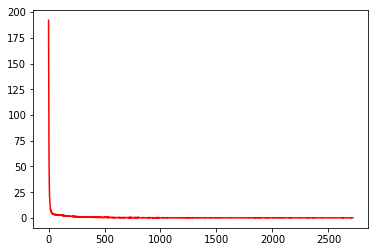

In [28]:
plt.plot(losses,linestyle='-',color='red')
plt.show()


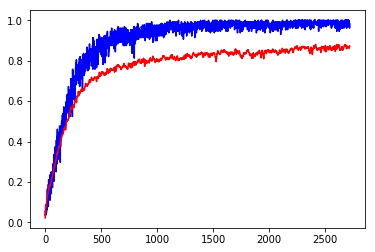

In [29]:
plt.plot(training_accuracies,linestyle='-',color='blue')
plt.plot(validation_accuracies,linestyle='-',color='red')
plt.show()

# Results for model without pre processing and augmentation

1. Validation accuracy : 87.3
2. There is sudden recovery of loss at start
3. There is gap between trainig accuracy and validation accuracy that shows that eighter model has become complex or we need additional data

# Approch 2:  Train model with pre processing

In [47]:
losses=[]
training_accuracies=[]
validation_accuracies=[]

In [48]:
#EPOCHS = 3
import time

start_time = time.time()

EPOCHS = 10
BATCH_SIZE = 128

# tensors entities are adjusted for input channel to 1

new_xx_preprocessed=doPreProcess(X_train)
valid_x_preprocessed=doPreProcess(X_valid)

print(len(new_xx_preprocessed))

train_model(new_xx_preprocessed,y_train,valid_x_preprocessed,y_valid,use_dropout=False,model_prefix='./original_preprocessed')

end_time = time.time()

t_sec = round(end_time - start_time)
(t_min, t_sec) = divmod(t_sec,60)
(t_hour, t_min) = divmod(t_min,60) 
print('Time for training: {}hour:{}min:{}sec'.format(t_hour,t_min,t_sec))

Contract for im no  10000
Contract for im no  20000
Contract for im no  30000
34799
Total ecochs :  10
Total training examples : 34799
Iterations per epoch 272
Epoch 1 ... 
Loss 0.274
Training Accuracy 0.910
Validation Accuracy 0.904
Epoch 2 ... 
Loss 0.113
Training Accuracy 0.955
Validation Accuracy 0.939
Epoch 3 ... 
Loss 0.032
Training Accuracy 1.000
Validation Accuracy 0.948
Epoch 4 ... 
Loss 0.069
Training Accuracy 0.982
Validation Accuracy 0.943
Epoch 5 ... 
Loss 0.006
Training Accuracy 1.000
Validation Accuracy 0.956
Epoch 6 ... 
Loss 0.002
Training Accuracy 1.000
Validation Accuracy 0.955
Epoch 7 ... 
Loss 0.011
Training Accuracy 0.991
Validation Accuracy 0.950
Epoch 8 ... 
Loss 0.006
Training Accuracy 1.000
Validation Accuracy 0.940
Epoch 9 ... 
Loss 0.012
Training Accuracy 0.991
Validation Accuracy 0.956
Epoch 10 ... 
Loss 0.002
Training Accuracy 1.000
Validation Accuracy 0.956
Time for training: 0hour:5min:21sec


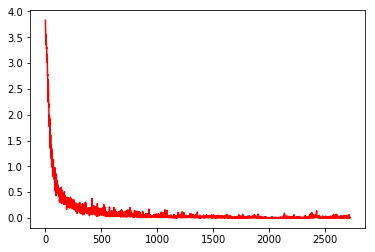

In [49]:
plt.plot(losses,linestyle='-',color='red')
plt.show()

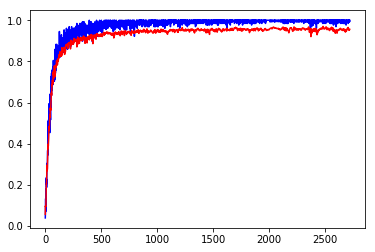

In [50]:
plt.plot(training_accuracies,linestyle='-',color='blue')
plt.plot(validation_accuracies,linestyle='-',color='red')
plt.show()

# Results for model with pre processing and no augmentation

1. Validation accuracy : 95.6
2. The loss reduction is near to idea
3. There is still gap between trainig accuracy and validation accuracy that shows that eighter model has become complex or we need additional data

# Agument for all trainig images

In [51]:

import time

start_time = time.time()

new_X,new_Y=augment_all_images(X_train,y_train,max_examples=4000)

end_time = time.time()

t_sec = round(end_time - start_time)
(t_min, t_sec) = divmod(t_sec,60)
(t_hour, t_min) = divmod(t_min,60) 
print('Time for augmentation: {}hour:{}min:{}sec'.format(t_hour,t_min,t_sec))

new_X=np.array(new_X)
new_Y=np.array(new_Y)


Started augmenting
Augmenting image number  10000
Augmenting image number  20000
Augmenting image number  30000
Time for augmentation: 0hour:0min:46sec


In [53]:
# Append augmented data with original set
new_xx=np.append(new_X,X_train,axis=0)
new_yy=np.append(new_Y,y_train,axis=0)

print(len(new_xx))
print(len(new_yy))


159155
159155


4002


<Container object of 43 artists>

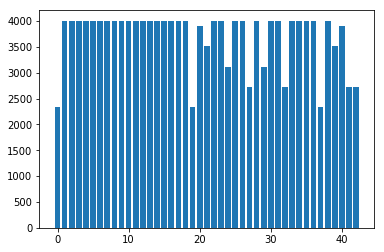

In [54]:
new_data_freq = get_frequency(new_yy,43)
print(new_data_freq[2])
plt.bar(range(43),new_data_freq)

# Approch 3 : Train model with pre processing and augmentation

In [57]:
losses=[]
training_accuracies=[]
validation_accuracies=[]

In [58]:
start_time = time.time()

EPOCHS = 10
BATCH_SIZE = 128

# tensors entities are adjusted for input channel to 1

new_xx_preprocessed=doPreProcess(new_xx)
valid_x_preprocessed=doPreProcess(X_valid)

print(len(new_xx_preprocessed))

train_model(new_xx_preprocessed,new_yy,valid_x_preprocessed,y_valid,use_dropout=False,model_prefix='./agumented_and_preprocessed')

end_time = time.time()

t_sec = round(end_time - start_time)
(t_min, t_sec) = divmod(t_sec,60)
(t_hour, t_min) = divmod(t_min,60) 
print('Time for training: {}hour:{}min:{}sec'.format(t_hour,t_min,t_sec))

Contract for im no  10000
Contract for im no  20000
Contract for im no  30000
Contract for im no  40000
Contract for im no  50000
Contract for im no  60000
Contract for im no  70000
Contract for im no  80000
Contract for im no  90000
Contract for im no  100000
Contract for im no  110000
Contract for im no  120000
Contract for im no  130000
Contract for im no  140000
Contract for im no  150000
159155
Total ecochs :  10
Total training examples : 159155
Iterations per epoch 1244
Epoch 1 ... 
Loss 0.274
Training Accuracy 0.902
Validation Accuracy 0.927
Epoch 2 ... 
Loss 0.139
Training Accuracy 0.961
Validation Accuracy 0.956
Epoch 3 ... 
Loss 0.082
Training Accuracy 0.980
Validation Accuracy 0.956
Epoch 4 ... 
Loss 0.042
Training Accuracy 0.980
Validation Accuracy 0.964
Epoch 5 ... 
Loss 0.037
Training Accuracy 1.000
Validation Accuracy 0.958
Epoch 6 ... 
Loss 0.060
Training Accuracy 0.980
Validation Accuracy 0.956
Epoch 7 ... 
Loss 0.004
Training Accuracy 1.000
Validation Accuracy 0.961
E

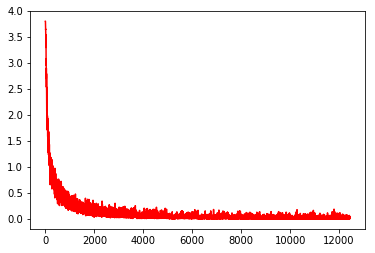

In [59]:
plt.plot(losses,linestyle='-',color='red')
plt.show()

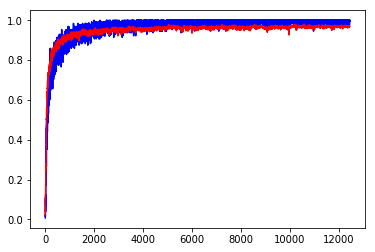

In [60]:
plt.plot(training_accuracies,linestyle='-',color='blue')
plt.plot(validation_accuracies,linestyle='-',color='red')
plt.show()

# Results for model with pre processing and augmentation

1. Validation accuracy : more than 96.9% achieved
2. The loss reduction was little bit sudden at start, this coule be because of high learning rate
3. The gap between training accuracy and validation accuracy got narrowed which is good sign that model is generalized and do not overfit

# Train model with pre processing and augmentation and drop out

In [61]:
losses=[]
training_accuracies=[]
validation_accuracies=[]

In [62]:
start_time = time.time()

EPOCHS = 10
BATCH_SIZE = 128

# tensors entities are adjusted for input channel to 1

#new_xx_preprocessed=doPreProcess(new_xx)
#valid_x_preprocessed=doPreProcess(X_valid)

print('trainig set', len(new_xx_preprocessed))

train_model(new_xx_preprocessed,new_yy,valid_x_preprocessed,y_valid,use_dropout=True,model_prefix='./agumented_and_preprocessed_dropout')

end_time = time.time()

t_sec = round(end_time - start_time)
(t_min, t_sec) = divmod(t_sec,60)
(t_hour, t_min) = divmod(t_min,60) 
print('Time for training: {}hour:{}min:{}sec'.format(t_hour,t_min,t_sec))

trainig set 159155
Total ecochs :  10
Total training examples : 159155
Iterations per epoch 1244
Epoch 1 ... 
Loss 0.964
Training Accuracy 0.725
Validation Accuracy 0.930
Epoch 2 ... 
Loss 0.386
Training Accuracy 0.863
Validation Accuracy 0.946
Epoch 3 ... 
Loss 0.233
Training Accuracy 0.922
Validation Accuracy 0.964
Epoch 4 ... 
Loss 0.270
Training Accuracy 0.882
Validation Accuracy 0.964
Epoch 5 ... 
Loss 0.212
Training Accuracy 0.922
Validation Accuracy 0.973
Epoch 6 ... 
Loss 0.095
Training Accuracy 0.980
Validation Accuracy 0.968
Epoch 7 ... 
Loss 0.076
Training Accuracy 0.980
Validation Accuracy 0.969
Epoch 8 ... 
Loss 0.172
Training Accuracy 0.941
Validation Accuracy 0.976
Epoch 9 ... 
Loss 0.294
Training Accuracy 0.902
Validation Accuracy 0.972
Epoch 10 ... 
Loss 0.194
Training Accuracy 0.922
Validation Accuracy 0.976
Time for training: 0hour:24min:13sec


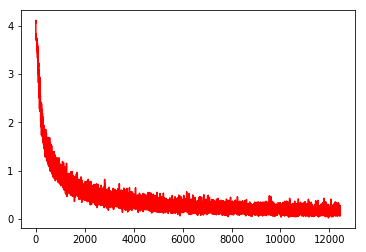

In [63]:
plt.plot(losses,linestyle='-',color='red')
plt.show()

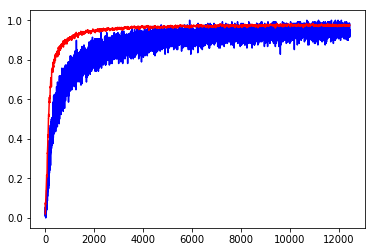

In [64]:
plt.plot(training_accuracies,linestyle='-',color='blue')
plt.plot(validation_accuracies,linestyle='-',color='red')
plt.show()

# Results for model with pre processing and augmentation and drop out

1. Validation accuracy : more than 97.6% achieved
2. The loss reduction was near to idea curve and it has zig zagg micro pattern due to use of drop out
3. The validation accuracy is more than training accuracy this is because of use of drop out during training.
4. The validation accuracy after 6000 iterations is consistant with training accuracy which shows that there is no over fitting. 

# Train model with pre processing and augmentation and drop out and reducing learning rate over time

In [70]:
# Increase number of epoches to rectify effect of drop out
# Reduce learning rate for better results at end
# Adding 10% lr rate at start and reducing it till 96% with 15 epoches

In [71]:
initial_lr_rate=0.0011

lr_schedule={}

EPOCHS=15

lr=initial_lr_rate
for i in range(EPOCHS):
    lr_schedule[i]=round(lr,5)
    lr=lr * 0.99
    
print(lr_schedule)


{0: 0.0011, 1: 0.00109, 2: 0.00108, 3: 0.00107, 4: 0.00106, 5: 0.00105, 6: 0.00104, 7: 0.00103, 8: 0.00102, 9: 0.001, 10: 0.00099, 11: 0.00098, 12: 0.00098, 13: 0.00097, 14: 0.00096}


In [72]:
losses=[]
training_accuracies=[]
validation_accuracies=[]

In [74]:
start_time = time.time()

EPOCHS = 15
BATCH_SIZE = 128

# tensors entities are adjusted for input channel to 1

#new_xx_preprocessed=doPreProcess(new_xx)
#valid_x_preprocessed=doPreProcess(X_valid)

print('trainig set', len(new_xx_preprocessed))

train_model(new_xx_preprocessed,new_yy,valid_x_preprocessed,y_valid,use_dropout=True,
            lr_rate_schedule=lr_schedule,model_prefix='./agumented_and_preprocessed_dropout_reduced_lr')

end_time = time.time()

t_sec = round(end_time - start_time)
(t_min, t_sec) = divmod(t_sec,60)
(t_hour, t_min) = divmod(t_min,60) 
print('Time for training: {}hour:{}min:{}sec'.format(t_hour,t_min,t_sec))

trainig set 159155
Total ecochs :  15
Total training examples : 159155
Iterations per epoch 1244
Epoch 1 ... 
lr rate : 0.0011
Loss 0.661
Training Accuracy 0.804
Validation Accuracy 0.931
Epoch 2 ... 
lr rate : 0.00109
Loss 0.678
Training Accuracy 0.784
Validation Accuracy 0.957
Epoch 3 ... 
lr rate : 0.00108
Loss 0.308
Training Accuracy 0.922
Validation Accuracy 0.959
Epoch 4 ... 
lr rate : 0.00107
Loss 0.220
Training Accuracy 0.941
Validation Accuracy 0.973
Epoch 5 ... 
lr rate : 0.00106
Loss 0.141
Training Accuracy 0.922
Validation Accuracy 0.970
Epoch 6 ... 
lr rate : 0.00105
Loss 0.189
Training Accuracy 0.941
Validation Accuracy 0.974
Epoch 7 ... 
lr rate : 0.00104
Loss 0.140
Training Accuracy 0.941
Validation Accuracy 0.972
Epoch 8 ... 
lr rate : 0.00103
Loss 0.350
Training Accuracy 0.863
Validation Accuracy 0.978
Epoch 9 ... 
lr rate : 0.00102
Loss 0.111
Training Accuracy 0.980
Validation Accuracy 0.974
Epoch 10 ... 
lr rate : 0.001
Loss 0.140
Training Accuracy 0.941
Validation 

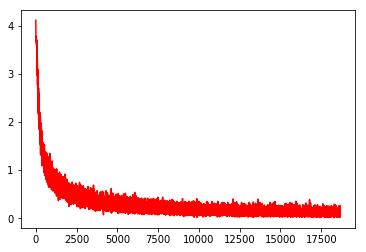

In [75]:
plt.plot(losses,linestyle='-',color='red')
plt.show()

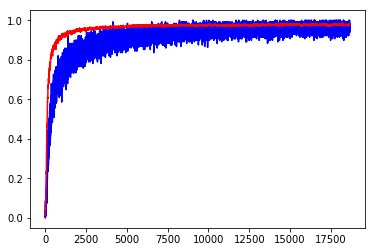

In [76]:
plt.plot(training_accuracies,linestyle='-',color='blue')
plt.plot(validation_accuracies,linestyle='-',color='red')
plt.show()

# Results for model with pre processing and augmentation and drop out

1. Validation accuracy : near to 97.7% achieved
2. The loss reduction was near to idea curve and it has zig zagg micro pattern due to use of drop out
3. The validation accuracy is more than training accuracy this is because of use of drop out during training.
4. The validation accuracy after 6000 iterations is consistant with training accuracy which shows that there is no over fitting. 

# Test best model on Test images

In [80]:
# Test model

test_x_preprocessed=doPreProcess(X_test)

with tf.Session() as session :
    saver.restore(session,tf.train.latest_checkpoint('.'))
    
    test_accuracy=evaluate_model(test_x_preprocessed,y_test)
    print("Test accuracy :{:.3f}".format(test_accuracy))
    

Contract for im no  10000
Test accuracy :0.955


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

[('new_images/11_right_of_way.jpg', '11_right_of_way.jpg'), ('new_images/38_keep_right.jpg', '38_keep_right.jpg'), ('new_images/31_wild_animals_ahead.jpg', '31_wild_animals_ahead.jpg'), ('new_images/25_men_at_work.jpg', '25_men_at_work.jpg'), ('new_images/01_speed_limit_30.jpg', '01_speed_limit_30.jpg'), ('new_images/14_stop_sign.jpg', '14_stop_sign.jpg'), ('new_images/12_priority_road.jpg', '12_priority_road.jpg')]


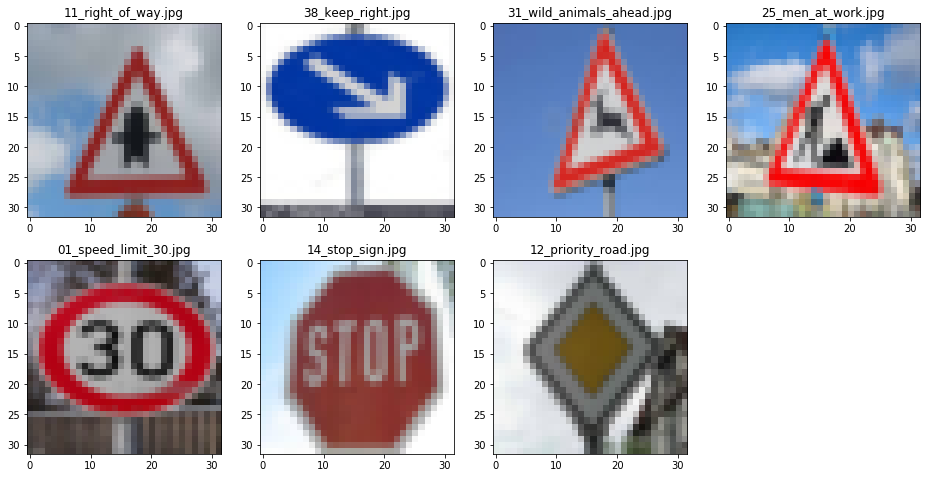

In [86]:
# Resize images to 32 x 32

import os
import numpy as np
from scipy.misc import imread,imresize
#import cv2
import matplotlib.pyplot as plt

%matplotlib inline

file_list=os.listdir('new_images')
im_files = [(os.path.join('new_images',f), f) for f in file_list if 'jpg' in f]

print(im_files)

f_names=[]

im=None
im_list=[]
for f in im_files:
    im=imread(f[0])
    im_resized=imresize(im,(32,32,3))
    im_list.append(im_resized)
    f_names.append(f[1])
    

new_images=np.array(im_list)
plot_multiple_images(new_images,f_names,number_of_cols=4)

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [87]:
new_images_labels=[11,38,31,25,1,14,12]

new_ims_preprocessed=doPreProcess(new_images)

with tf.Session() as session :
    saver.restore(session,tf.train.latest_checkpoint('.'))
    
    test_accuracy=evaluate_model(new_ims_preprocessed,new_images_labels)
    print("Test accuracy :{:.3f}".format(test_accuracy))


Test accuracy :0.714


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [88]:
label_pred=tf.nn.softmax(logits)
top5 = tf.nn.top_k(label_pred, 5)

In [89]:
top5_pred=None
with tf.Session() as session :
    saver.restore(session,tf.train.latest_checkpoint('.'))
    top5_pred = session.run([label_pred, top5], feed_dict={x:new_ims_preprocessed,y:new_images_labels,keep_prob:1.0})

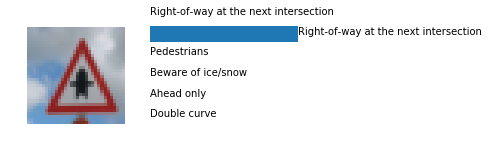

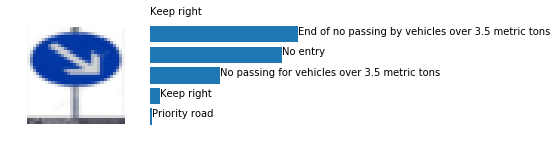

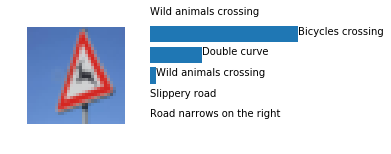

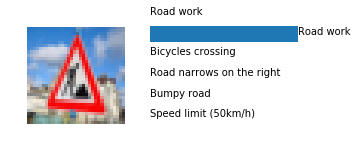

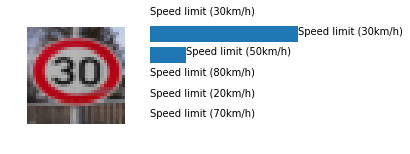

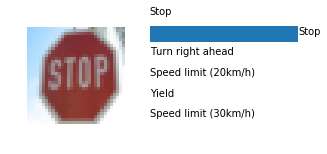

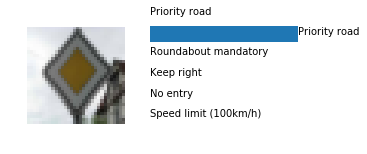

In [90]:
import matplotlib.gridspec as gridspec

for i in range(len(new_images)):
    plt.figure(figsize = (5,2))
    gs = gridspec.GridSpec(1, 2,width_ratios=[5,8])
    plt.subplot(gs[0])
    plt.imshow(new_images[i])
    plt.axis('off')
    plt.subplot(gs[1])
    plt.barh(6-np.arange(5),top5_pred[1][0][i], align='center')
    for i_label in range(5):
        plt.text(top5_pred[1][0][i][i_label],6-i_label,
            signs[str(top5_pred[1][1][i][i_label])])
    plt.axis('off')
    plt.text(0,6.95,signs[str(new_images_labels[i])])
    plt.show();

# Conclusion on new images

1. 5 out of 7 images get classified correclty with distinct margin with other classes
2. 2 images get wrongly classified
    a. Keep right : this image get classified as 'End of no passing by vehicles over 3.5 metric tons' 
    Possible issues are : both sign types have circular shapes and the test image contains lot of white pixels and same was the case for 'End of ..' image
    b. Wild animals crossing : This image get classified as 'bicycles crossing' 
    Possible issue are : Both signs are rectangle in shape and have white background and black paint. The second best possibility was double curve and with blur eyes its content look similar to figure of a dear sign.
    


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")